<a href="https://colab.research.google.com/github/figkkkmmmm/Work-with-GIT/blob/main/Krivoruchko_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Анализ данных**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Cars Datasets 2025.csv", encoding = 'latin1')

In [5]:
df.head() #информация о полях датасета

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [6]:
df.info() #информация о полях датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [7]:
df.shape #количество строк/столбцов

(1218, 11)

In [8]:
df.columns #список столбцов

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')

In [9]:
df.info() #типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [10]:
df.isnull().sum() #доля пропусков

,0
Company Names,0
Cars Names,0
Engines,0
CC/Battery Capacity,3
HorsePower,0
Total Speed,0
Performance(0 - 100 )KM/H,6
Cars Prices,0
Fuel Types,0
Seats,0


# Обработка данных

In [11]:
 #удаление различных символов
df['HorsePower'] = df['HorsePower'].str.replace('hp', '', regex=True)
df['Total Speed'] = df['Total Speed'].str.replace('km/h', '', regex=True)
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].str.replace('sec', '', regex=True)
df['Cars Prices'] = df['Cars Prices'].str.replace('[$,,]', '', regex=True)
df['CC/Battery Capacity'] = df['CC/Battery Capacity'].str.replace('[,cc]', '', regex=True)
df['Torque'] = df['Torque'].str.replace(' Nm', '', regex=True)
df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce')
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990,963,340,2.5,1100000,plug in hyrbrid,2.0,800
1,ROLLS ROYCE,PHANTOM,V12,6749,563,250,5.3,460000,Petrol,5.0,900
2,Ford,KA+,1.2L Petrol,1200,70-85,165,10.5,12000-15000,Petrol,5.0,100 - 140
3,MERCEDES,GT 63 S,V8,3982,630,250,3.2,161000,Petrol,4.0,900
4,AUDI,AUDI R8 Gt,V10,5204,602,320,3.6,253290,Petrol,2.0,560
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487,240,180,7.6,43590  48000,Hybrid (Gas + Electric),5.0,239
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 + Battery,326,180,6.8,50000,Hybrid,7.0,630
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 / Hybrid batt,169  196,190,8.0  9.2,25210  29135,Gas / Hybrid,5.0,190  210
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 + batt,140  198,180,7.9  10.5, 33000,Hybrid,5.0,190  205


In [12]:
 #привидение к float/int числовые поля
arr = ['HorsePower','Total Speed','Performance(0 - 100 )KM/H','Cars Prices','CC/Battery Capacity','Torque','Seats']
for i in range(len(arr)):
  df[arr[i]] = pd.to_numeric(df[arr[i]],errors='coerce')
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2.0,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563.0,250.0,5.3,460000.0,Petrol,5.0,900.0
2,Ford,KA+,1.2L Petrol,1200.0,NaN,165.0,10.5,NaN,Petrol,5.0,NaN
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,Petrol,4.0,900.0
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,Petrol,2.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487.0,240.0,180.0,7.6,NaN,Hybrid (Gas + Electric),5.0,239.0
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),NaN,326.0,180.0,6.8,50000.0,Hybrid,7.0,630.0
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,NaN,NaN,190.0,NaN,NaN,Gas / Hybrid,5.0,NaN
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,NaN,NaN,180.0,NaN,NaN,Hybrid,5.0,NaN


In [13]:
#удаление дубликатов
df.drop_duplicates(inplace=True)
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2.0,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563.0,250.0,5.3,460000.0,Petrol,5.0,900.0
2,Ford,KA+,1.2L Petrol,1200.0,NaN,165.0,10.5,NaN,Petrol,5.0,NaN
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,Petrol,4.0,900.0
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,Petrol,2.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487.0,240.0,180.0,7.6,NaN,Hybrid (Gas + Electric),5.0,239.0
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),NaN,326.0,180.0,6.8,50000.0,Hybrid,7.0,630.0
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,NaN,NaN,190.0,NaN,NaN,Gas / Hybrid,5.0,NaN
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,NaN,NaN,180.0,NaN,NaN,Hybrid,5.0,NaN


# Статистика

In [14]:
# вывод min max mean median для каждого числового столбца
arr = ['HorsePower','Total Speed','Performance(0 - 100 )KM/H','Cars Prices','CC/Battery Capacity','Torque','Seats']
for i in range(len(arr)):
    print(arr[i])
    print('min = %1.7s max = %1.7s mean = %1.7s median = %1.7s' % (df[arr[i]].min(),df[arr[i]].max(),df[arr[i]].mean(),df[arr[i]].median()))
    print()

HorsePower
min = 26.0 max = 1850.0 mean = 317.881 median = 272.0

Total Speed
min = 80.0 max = 500.0 mean = 216.555 median = 200.0

Performance(0 - 100 )KM/H
min = 1.9 max = 35.0 mean = 7.57026 median = 7.1

Cars Prices
min = 4000.0 max = 1800000 mean = 150965. median = 47000.0

CC/Battery Capacity
min = 360.0 max = 16100.0 mean = 3094.27 median = 2500.0

Torque
min = 45.0 max = 3500.0 mean = 434.321 median = 370.0

Seats
min = 1.0 max = 20.0 mean = 4.85595 median = 5.0



In [15]:
# Заполнение пустых числовых строк медианным значением столбца
for i in range(len(arr)):
    df[arr[i]].fillna(df[arr[i]].median(), inplace = True)
df

/tmp/ipython-input-1397219505.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[arr[i]].fillna(df[arr[i]].median(), inplace = True)


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2.0,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563.0,250.0,5.3,460000.0,Petrol,5.0,900.0
2,Ford,KA+,1.2L Petrol,1200.0,272.0,165.0,10.5,47000.0,Petrol,5.0,370.0
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,Petrol,4.0,900.0
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,Petrol,2.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487.0,240.0,180.0,7.6,47000.0,Hybrid (Gas + Electric),5.0,239.0
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2500.0,326.0,180.0,6.8,50000.0,Hybrid,7.0,630.0
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,2500.0,272.0,190.0,7.1,47000.0,Gas / Hybrid,5.0,370.0
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,2500.0,272.0,180.0,7.1,47000.0,Hybrid,5.0,370.0


In [16]:
# Заполнение пустых строковых строк значением Unknown
strr = ['Company Names','Cars Names','Engines']
for i in range(len(strr)):
    df[strr[i]].fillna('Unknown', inplace = True)
df

/tmp/ipython-input-1036923509.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[strr[i]].fillna('Unknown', inplace = True)


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2.0,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563.0,250.0,5.3,460000.0,Petrol,5.0,900.0
2,Ford,KA+,1.2L Petrol,1200.0,272.0,165.0,10.5,47000.0,Petrol,5.0,370.0
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,Petrol,4.0,900.0
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,Petrol,2.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487.0,240.0,180.0,7.6,47000.0,Hybrid (Gas + Electric),5.0,239.0
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2500.0,326.0,180.0,6.8,50000.0,Hybrid,7.0,630.0
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,2500.0,272.0,190.0,7.1,47000.0,Gas / Hybrid,5.0,370.0
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,2500.0,272.0,180.0,7.1,47000.0,Hybrid,5.0,370.0


In [17]:
# Вывод лучших тачек по трём категориям: Cars Prices, Total Speed, HorsePower
df.sort_values('Cars Names',ignore_index =True,inplace = True)
print('max по цене:',df['Cars Names'].iloc[df['Cars Prices'].idxmax()])
print('max по скорости:',df['Cars Names'].iloc[df['Total Speed'].idxmax()])
print('max по мощности:',df['Cars Names'].iloc[df['HorsePower'].idxmax()])
#df.iloc[df['Cars Prices'].idxmax()]

max по цене: La Voiture Noire
max по скорости: Bolide
max по мощности: Bolide


# Визуализация



<Axes: >

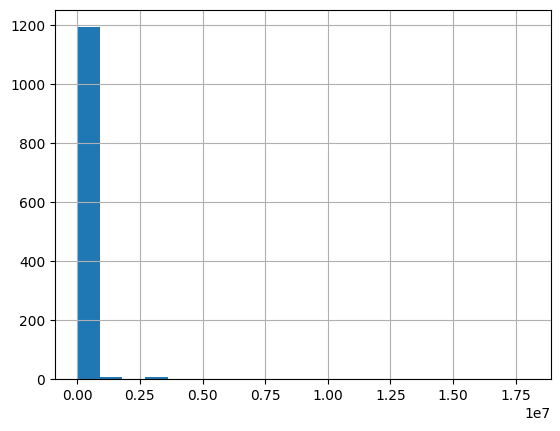

In [18]:
#Гистограмма для Car Prices
df['Cars Prices'].hist(bins=20)



<Axes: >

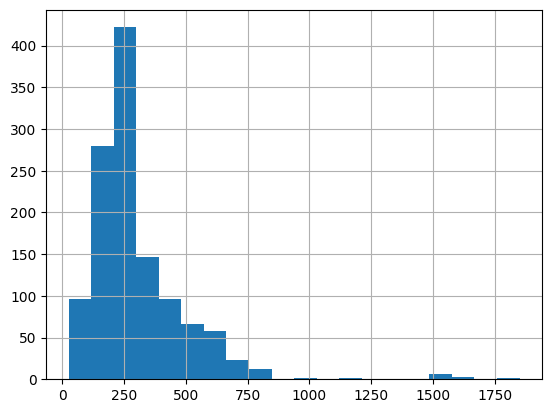

In [19]:
#гистограмма для Horsepower
df['HorsePower'].hist(bins=20)

**Вывод о средней мощности:**

Средняя мощность будет в диапазоне **300-400 л.с**.

<Axes: >

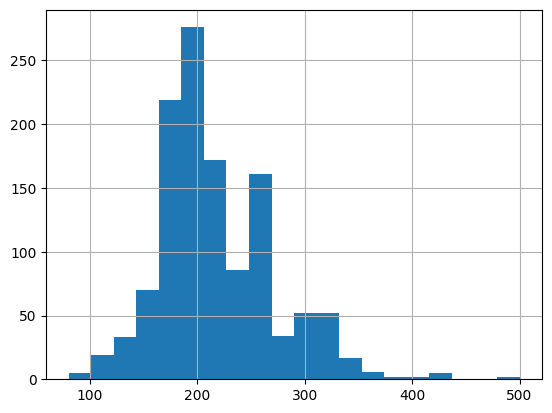

In [20]:
#Гистограмма для Total Speed
df['Total Speed'].hist(bins=20)

**Вывод о средней скорости:**

Средняя скорость составляет примерно **250-300** , но:

Большинство значений сосредоточено в диапазоне 150-350 единиц

# ТОП10 брендов по числу моделей

<Axes: ylabel='count'>

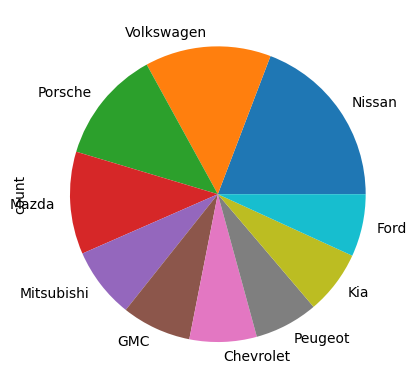

In [21]:

brand_counts = df['Company Names'].value_counts()
brand_counts = brand_counts[0:10]
brand_counts.plot(kind='pie')

# Распределение скорости автомобилей по брендам

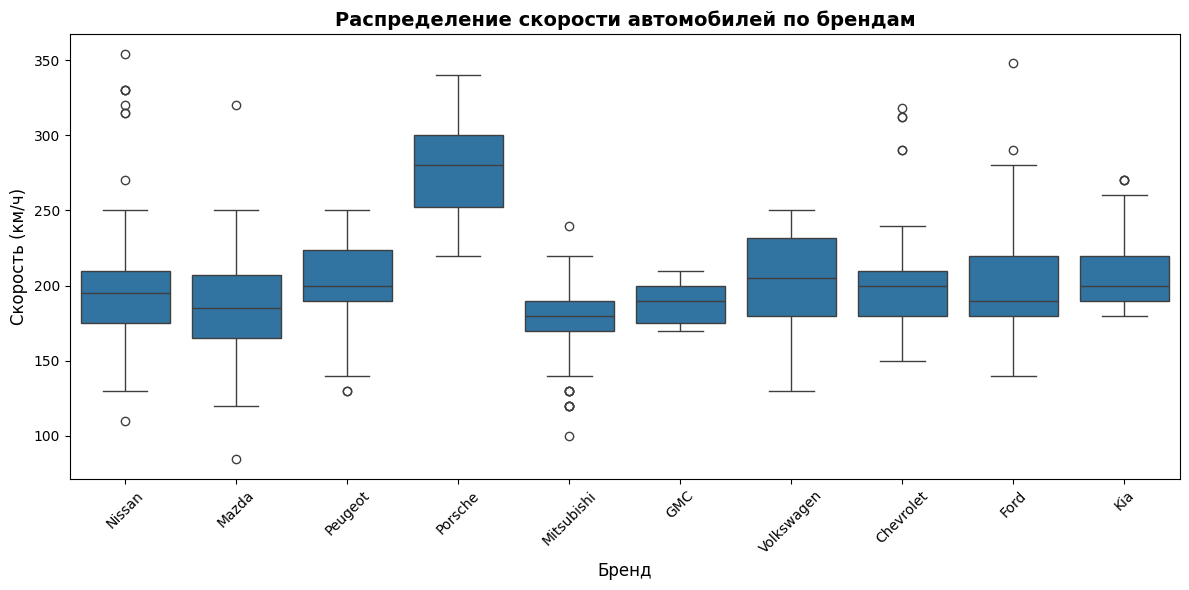

In [28]:
# Создаем список топ-10 брендов по количеству автомобилей
top_10_brands = df['Company Names'].value_counts().head(10).index

# Фильтруем данные только для этих брендов
filtered_df = df[df['Company Names'].isin(top_10_brands)]

# Строим boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Company Names', y='Total Speed')
plt.title('Распределение скорости автомобилей по брендам', fontsize=14, fontweight='bold')
plt.xlabel('Бренд', fontsize=12)
plt.ylabel('Скорость (км/ч)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📈**Анализ медианных значений:**

**Высокая медианная скорость** (250-350 км/ч):
Бренды 1, 2, 9 - имеют самую высокую медианную скорость (300-350 км/ч)



***Средняя медианная скорость*** (150-250 км/ч):
Бренды 0, 3, 4, 5, 6, 7, 8 - средний диапазон скоростей


***Низкая медианная скорость*** (до 150 км/ч):
Бренд 10 - самый низкий медианный показатель скорости


📈 **Анализ дисперсии и разброса данных:**

***Высокая дисперсия*** (большой разброс скоростей):
Бренды 1, 2, 9

Значительный разброс от ~150 до 400+ км/ч


***Умеренная дисперсия:***
Бренды 0, 3, 4, 5, 6, 7 - средний разброс данных

**Низкая дисперсия** (малый разброс):
Бренд 8 - самый компактный бокс

Бренд 10 - также малый разброс, но в нижнем диапазоне





# Матрица корреляций

<Axes: >

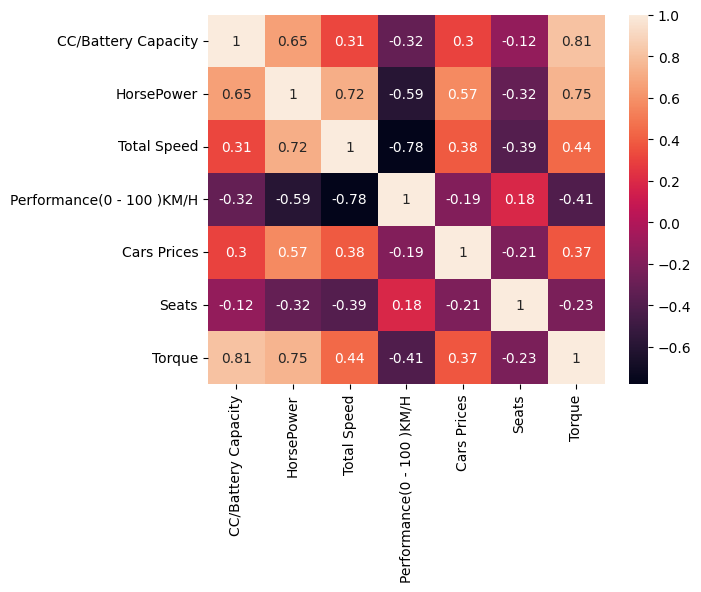

In [26]:
#Матрица корреляций
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Вывод**:

🥇 1. Torque

*Корреляция*: 0.81 - самая сильная положительная связь

🥈 2. HorsePower

*Корреляция*: 0.75 - очень сильная положительная связь

🥉 3. CC/Battery *Capacity*

*Корреляция*: 0.65 - сильная положительная связь